                                                    CREDIT RISK ASSESMENT SYSTEM

1. Data Understanding and Preprocessing

1.1 Load and Inspect Data

In [1]:
# Importing the core libraries and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [2]:
# Importing the metrics and splitting and Model 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the Data Set
Data_Frame = pd.read_csv("credit_risk_dataset_ANN.csv")


In [4]:
# Overview of the first 5 rows
Data_Frame.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
# Overview the Data Information -> NULL Values and Data Type
Data_Frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Getting the dimensions of the Data Frame
print("Shape of the DataSet: ", Data_Frame.shape)


Shape of the DataSet:  (32581, 12)


1.2 Handling Missing and Duplicate Values

In [7]:
# Checking for missing values
print(Data_Frame.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [8]:
# Impute missing values with median for numerical columns

Data_Frame['person_emp_length'].fillna(Data_Frame['person_emp_length'].median(), inplace=True)
Data_Frame['loan_int_rate'].fillna(Data_Frame['loan_int_rate'].median(), inplace=True)


C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\2542157825.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_Frame['person_emp_length'].fillna(Data_Frame['person_emp_length'].median(), inplace=True)
C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\2542157825.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [9]:
# Checking for missing values
print(Data_Frame.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [10]:
# Check for duplicate rows
print("Duplicate rows: ", Data_Frame.duplicated().sum())


Duplicate rows:  165


In [11]:
# Drop Duplicates if any
Data_Frame = Data_Frame.drop_duplicates()


In [12]:
# Checking the Info about the Data Frame
Data_Frame.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [13]:
# Check for duplicate rows
print("Duplicated Rows: ", Data_Frame.duplicated().sum())


Duplicated Rows:  0


2. FEATURE ENGINEERING

2.1 BASIC STATISTICS

In [14]:
# Summary Statistics
print(Data_Frame.describe())


         person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   3.241600e+04       32416.000000  32416.000000   
mean      27.747008   6.609164e+04           4.768880   9593.845632   
std        6.354100   6.201558e+04           4.090411   6322.730241   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.854200e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.921800e+04           7.000000  12250.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32416.000000  32416.000000         32416.000000   
mean       11.014662      0.218688             0.170250   
std         3.083050      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%   

2.2 DATA VISUALISATION

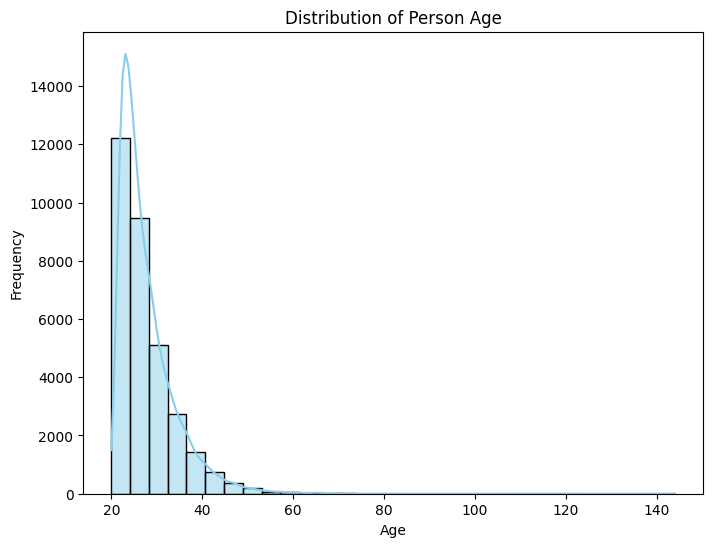

In [15]:
# 2.1 Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(Data_Frame['person_age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

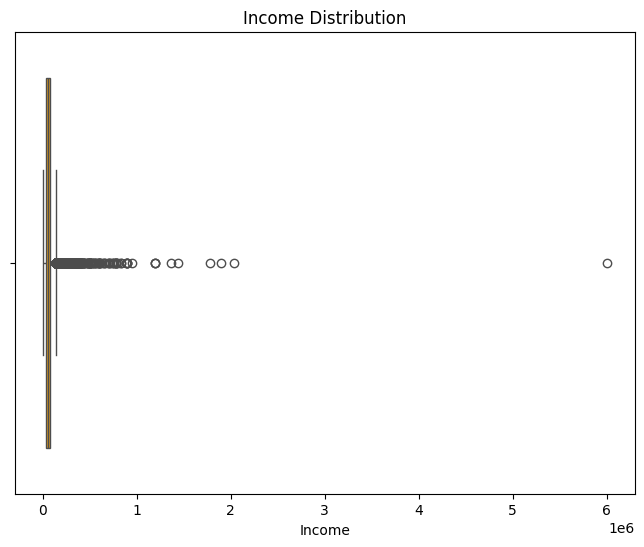

In [16]:
# 2.2 Income Distribution'
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data_Frame, x='person_income', color='orange')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()

C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\4250833123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data_Frame, x='person_home_ownership', y='person_emp_length', palette="viridis")


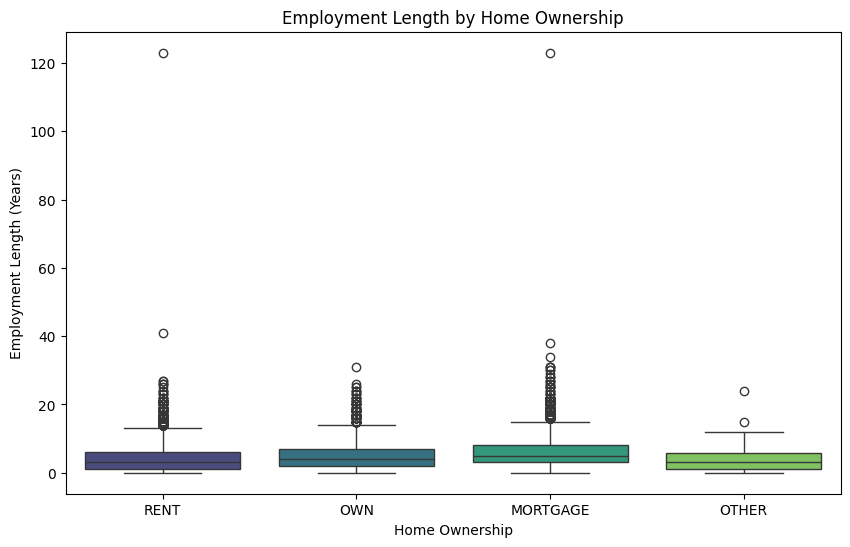

In [17]:
# 2.3 Employment length by Home Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Frame, x='person_home_ownership', y='person_emp_length', palette="viridis")
plt.title("Employment Length by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Employment Length (Years)")
plt.show()

C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\1437072867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Data_Frame, x='loan_intent', palette="Set2")


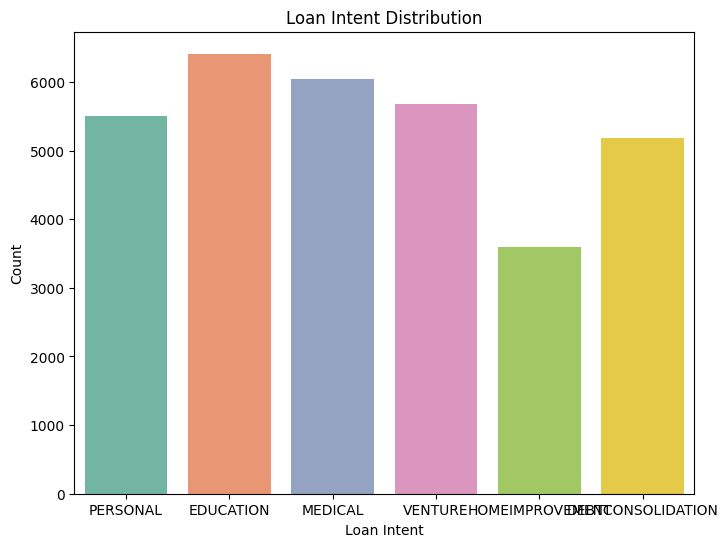

In [18]:
# 2.4 Loan Intent Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=Data_Frame, x='loan_intent', palette="Set2")
plt.title("Loan Intent Distribution")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.show()

C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\1332195842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data_Frame, x='loan_grade', y='loan_amnt', palette="coolwarm")


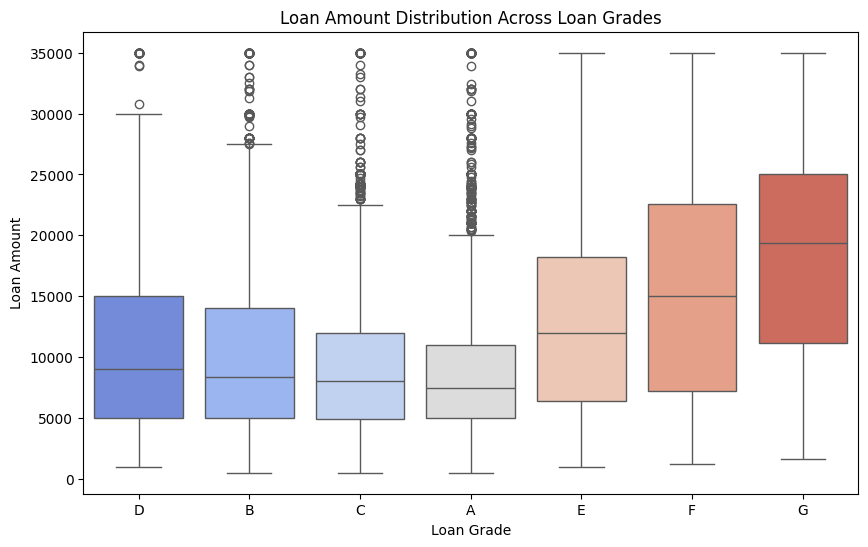

In [19]:
# 2.5 Loan Grade vs Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Frame, x='loan_grade', y='loan_amnt', palette="coolwarm")
plt.title("Loan Amount Distribution Across Loan Grades")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Amount")
plt.show()

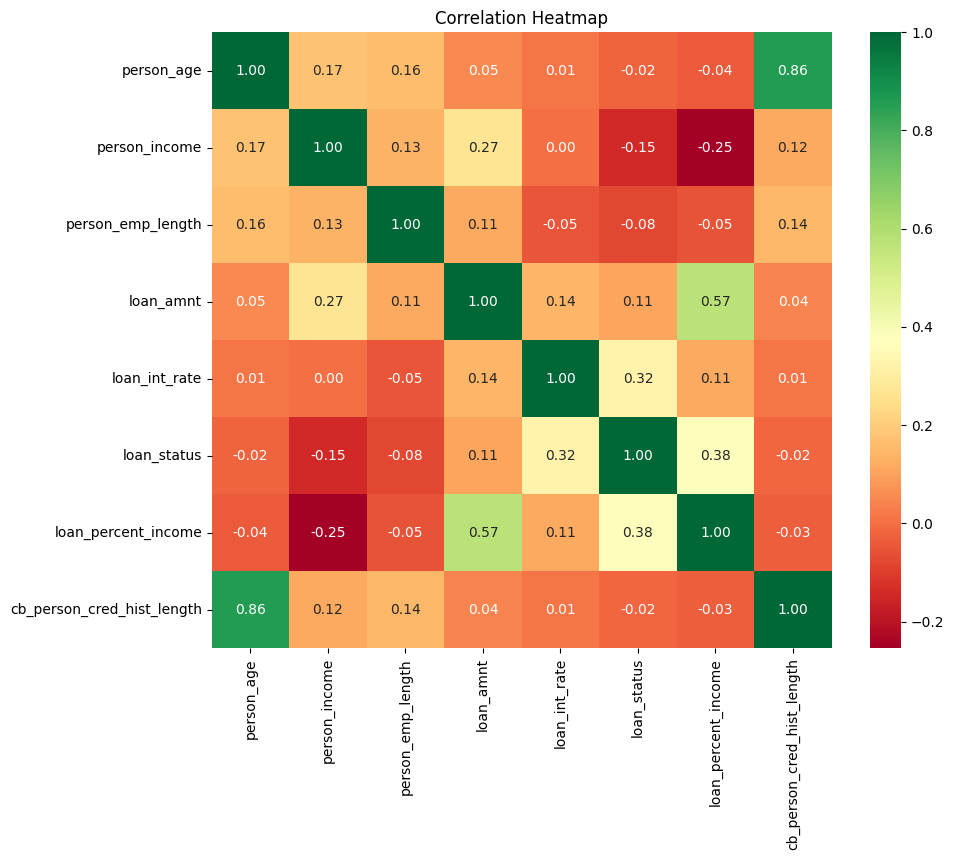

In [20]:
# 2.6 Correlation HeatMap

# Select only numeric columns
numeric_data = Data_Frame.select_dtypes(include=['number'])

# Handle missing values (e.g., fill with mean or drop them)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


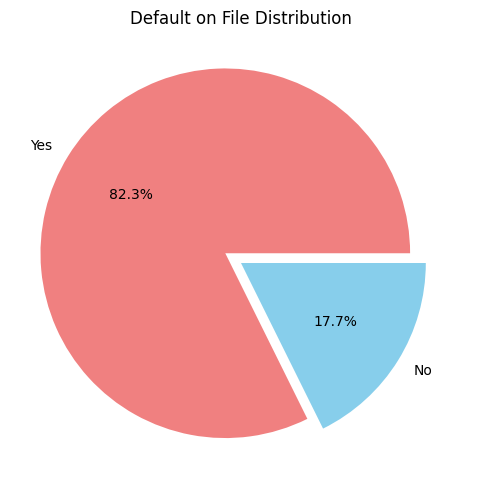

In [21]:
# 2.7 Default on File pie chart
plt.figure(figsize=(8, 6))
Data_Frame['cb_person_default_on_file'].value_counts().plot.pie(
    autopct='%1.1f%%', explode=[0.1, 0.0], colors=['lightcoral', 'skyblue'], labels=['Yes', 'No'])
plt.title("Default on File Distribution")
plt.ylabel("")
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\1919222660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Data_Frame, x='loan_status', palette="muted")


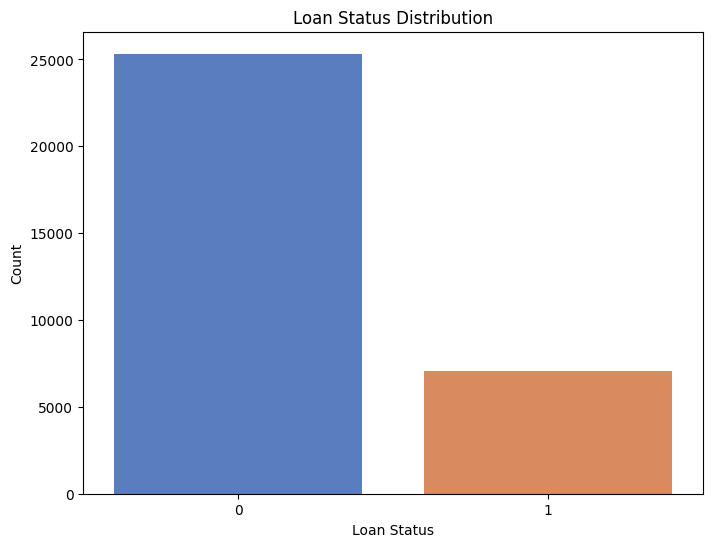

In [22]:
# 2.8 Loan Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=Data_Frame, x='loan_status', palette="muted")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\767915489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Data_Frame, x='loan_intent', y='loan_percent_income', palette="Spectral")


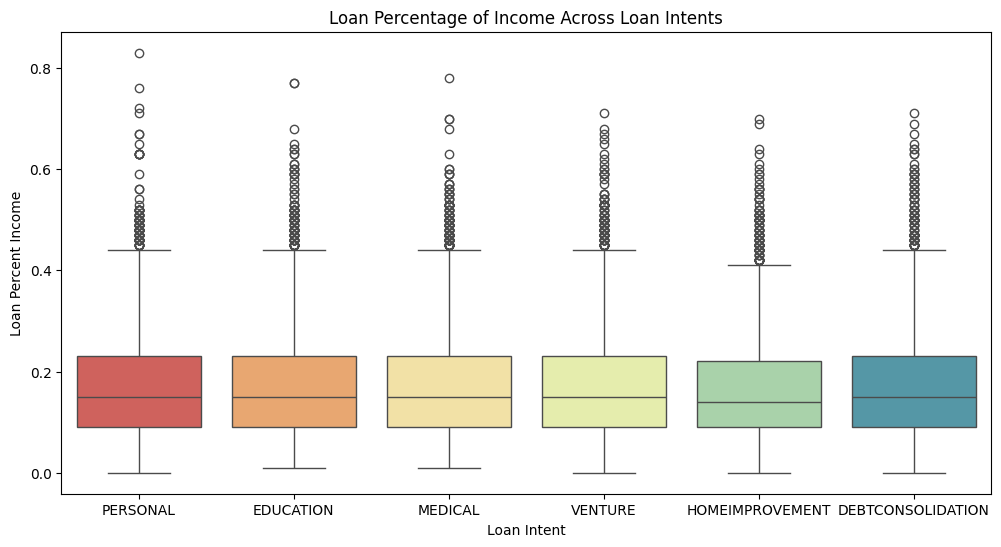

In [23]:
# 2.9 Loan Percentage of Income by Loan Intent
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data_Frame, x='loan_intent', y='loan_percent_income', palette="Spectral")
plt.title("Loan Percentage of Income Across Loan Intents")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Percent Income")
plt.show()

3. MODEL PREPARATION

3.1 Encoding and Splitting Data

In [24]:
# Features and Target
X = Data_Frame.drop(columns=['loan_status'])
Y = Data_Frame['loan_status']


In [25]:
# Printing thr respective Values
print("X : \n", X)
print("\n\n\n")
print("Y : \n", Y)

X : 
        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
0     

In [26]:
# Getting the Dimensions of the X and Y
print("X shape : ", X.shape)
print("Y shape : ", Y.shape)


X shape :  (32416, 11)
Y shape :  (32416,)


In [27]:
# One-Hot Encoding for Categorical Features
X = pd.get_dummies(X, drop_first=True)


In [28]:
# Number of classes of Y
num_classes = len(np.unique(Y))
print(num_classes)

2


In [29]:
# Train-Test Split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# Checking the shapes of above
print("X_Train shape : ", X_Train.shape)
print("Y_Train shape : ", Y_Train.shape)
print("X_Test shape  : ", X_Test.shape)
print("Y_Test shape  : ", Y_Test.shape)


X_Train shape :  (25932, 22)
Y_Train shape :  (25932,)
X_Test shape  :  (6484, 22)
Y_Test shape  :  (6484,)


In [31]:
# Feature Scaling
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)


4. DEEP LEARNING MODEL

4.1 ANN MODEL DESIGN

In [32]:
# ANN Model Architecture
model = Sequential()
model.add(Dense(64, input_dim= X_Train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [34]:
# Model Training
history = model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=50, batch_size=32, verbose= 1)


Epoch 1/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8230 - loss: 0.4225 - val_accuracy: 0.8883 - val_loss: 0.2998
Epoch 2/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3264 - val_accuracy: 0.9028 - val_loss: 0.2749
Epoch 3/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.2975 - val_accuracy: 0.9109 - val_loss: 0.2601
Epoch 4/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8960 - loss: 0.2851 - val_accuracy: 0.9116 - val_loss: 0.2549
Epoch 5/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.2634 - val_accuracy: 0.9141 - val_loss: 0.2485
Epoch 6/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9082 - loss: 0.2632 - val_accuracy: 0.9161 - val_loss: 0.2435
Epoch 7/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9093 - loss: 0.2594 - val_accuracy: 0.9149 - val_loss: 0.2462
Epoch 8/50
811/811 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9112 - loss: 0.2554 - val_accuracy: 0.

5. RESULTS AND INSIGHTS

In [35]:
# Model Evaluation
loss, accuracy = model.evaluate(X_Test, Y_Test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9213 - loss: 0.2285
Test Loss: 0.21707789599895477
Test Accuracy: 0.9264342784881592


In [36]:
# Predictions
predictions = model.predict(X_Test)
print("Predictions shape:", predictions.shape)


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (6484, 2)


In [37]:
# Adjust Y_Pred depending on the output shape
if len(predictions.shape) > 1 and predictions.shape[1] > 1:
    Y_Pred = np.argmax(predictions, axis=-1)  
else:
    Y_Pred = predictions 

In [38]:
# Adjust Y_Test_Actual depending on the format of Y_Test
if len(Y_Test.shape) > 1 and Y_Test.shape[1] > 1:
    Y_Test_Actual = np.argmax(Y_Test, axis=-1)  
else:
    Y_Test_Actual = Y_Test 


In [39]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(Y_Test_Actual, Y_Pred))
print("Classification Report:\n", classification_report(Y_Test_Actual, Y_Pred))

Confusion Matrix:
 [[5049   24]
 [ 453  958]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95      5073
           1       0.98      0.68      0.80      1411

    accuracy                           0.93      6484
   macro avg       0.95      0.84      0.88      6484
weighted avg       0.93      0.93      0.92      6484



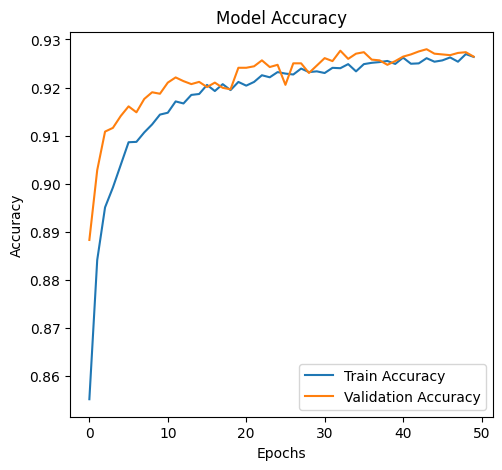

In [40]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

C:\Users\mahes\AppData\Local\Temp\ipykernel_14056\930978261.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


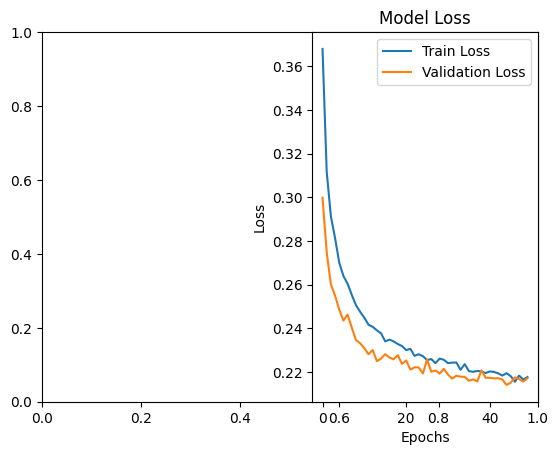

In [41]:
# Plot training & validation loss
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

6. DEPLOYMENT

In [42]:
# Save the Model
model.save("credit_risk_ann_model.h5")
print("Model saved as 'credit_risk_ann_model.h5'")


Model saved as 'credit_risk_ann_model.h5'


In [43]:
# Load the saved ANN model
import tensorflow
loaded_model = tensorflow.keras.models.load_model("credit_risk_ann_model.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [44]:
# Example: Predicting new data
# Replace 'new_data' with actual input data in the same format as the training data
new_data = X_Test[:5]  


In [45]:
# Predicted data outptu of newData
predictions = loaded_model.predict(new_data)
predicted_classes = np.argmax(predictions, axis=1)
print("Predictions for new data:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions for new data: [0 1 0 0 0]


In [46]:
# True Data output of NewData
true_classes = Y_Test[:5]
print("The True classes of new Data:\n", true_classes)


The True classes of new Data:
 20562    0
1090     1
4762     0
12381    0
15112    0
Name: loan_status, dtype: int64


In [47]:
# Predicted Classes for new Data
predicted_classes = np.argmax(model.predict(X_Test[:5]), axis=1)
print("Predicted Classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Classes: [0 1 0 0 0]
